## Exploring the probabilities in a poker game by running simulated games


In [1]:
# Required imports
import heapq
import sys
from collections import Counter
import numpy as np
from Card import Card
from Card import Player
from PrintCard import ascii_version_of_card
import argparse
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
Initialising a deck of cards and shuffling it.
'''
suits = ["Spades","Hearts","Clubs","Diamonds"]
numbers = ["2","3","4","5","6","7","8","9","T","J","Q","K","A"]
deckofCards = np.empty(52,dtype=object)
for i,suit in enumerate(suits):
    for j,num in enumerate(numbers):
        deckofCards[i*13+j] = Card(num,suit)
    
shuffledcards = np.random.choice(deckofCards,size=len(deckofCards),replace=False)
for card in shuffledcards[:10]:
    print(card,end="\t")

4♥	8♠	11♦	12♠	9♥	7♥	7♦	8♣	7♣	6♥	

In [7]:
# Distribute 5 cards to a player
newplayer = Player(1,np.random.choice(deckofCards,size=5,replace=False))
print(newplayer)

Player 1 has following cards
┌─────────┐┌─────────┐┌─────────┐┌─────────┐┌─────────┐
│5        ││9        ││T        ││7        ││K        │
│         ││         ││         ││         ││         │
│         ││         ││         ││         ││         │
│    ♣    ││    ♠    ││    ♣    ││    ♥    ││    ♦    │
│         ││         ││         ││         ││         │
│         ││         ││         ││         ││         │
│        5││        9││        T││        7││        K│
└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘

Card Score: 13


In [3]:
def runSimulation(deckofCards,n):
    '''
    Function to run poker simulation
    '''
    ResultDict = {
            "OnePair":0,
            "TwoPair": 0,
            'ThreeKind':0,
            'Straight':0,
            'Flush':0,
            'FullHouse':0,
            'FourKind':0,
            'StraightFlush':0,
            'RoyalFlush':0,
            'TotalGames':0    
        }
    for i in range(n):
        shuffledcards = np.random.choice(deckofCards,size=len(deckofCards),replace=False)
        newplayer = Player(1,np.random.choice(shuffledcards,size=5,replace=False))
        ResultDict['TotalGames']+=1
        for key in newplayer.ResultDict.keys():
            if newplayer.ResultDict[key]:
                ResultDict[key]+=1
    return ResultDict

In [4]:
numSimulation = 1000
ResultDict = runSimulation(deckofCards,numSimulation)

After runnig 1000 simulated games.
{'OnePair': 456, 'TwoPair': 47, 'ThreeKind': 20, 'Straight': 4, 'Flush': 1, 'FullHouse': 1, 'FourKind': 1, 'StraightFlush': 0, 'RoyalFlush': 0, 'TotalGames': 1000}


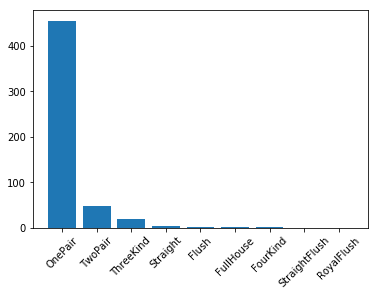

In [9]:
# Plotting the result
xticks = [key for key in ResultDict.keys()]
y = [value for value in ResultDict.values()]
print("After runnig {} simulated games.".format(numSimulation))
print(ResultDict)
plt.bar(xticks[:-1],y[:-1])
plt.xticks(rotation=45)
plt.show()